In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


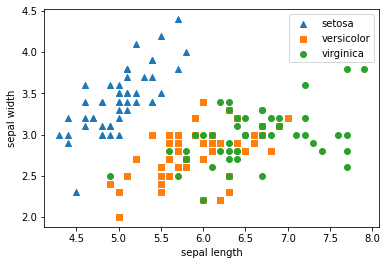

In [4]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^','s','o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2, 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data,y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler

#Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [7]:
pca_columns = ['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


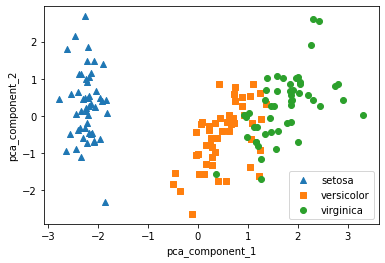

In [9]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^','s','o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2, 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [10]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [12]:
pca_X = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print(scores_pca)
print(np.mean(scores_pca))

[0.88 0.88 0.88]
0.88


In [13]:
df = pd.read_excel('./data/credit_card.xls',header=1,sheet_name='Data').iloc[0:,1:]
print(df.shape)

(30000, 24)


In [14]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
df.rename(columns={'PAY_0':'PAY_!','default payment next month':'default'},inplace=True)
y_target = df['default']
X_features = df.drop('default',axis=1)

<AxesSubplot:>

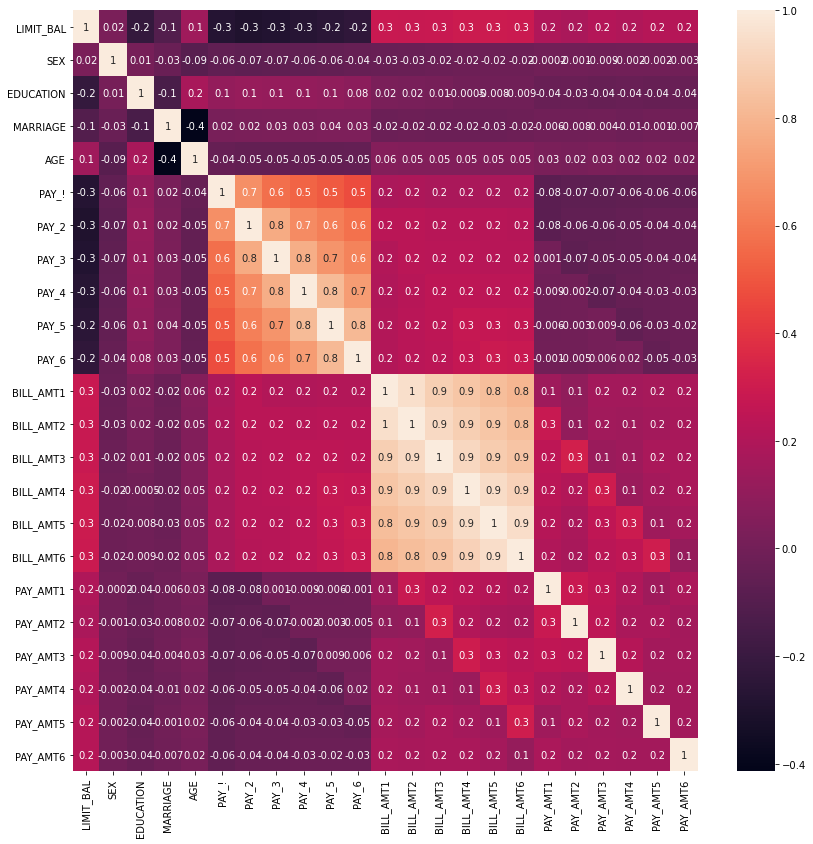

In [16]:
import seaborn as sns

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,fmt='.1g')

In [18]:
#BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명: ',cols_bill)

#2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit()호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print(pca.explained_variance_ratio_)

대상 속성명:  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
[0.90555253 0.0509867 ]


In [19]:
rcf = RandomForestClassifier(n_estimators=300, random_state = 156)
scores = cross_val_score(rcf,X_features, y_target, scoring='accuracy',cv=3)

print(scores)
print(np.mean(scores))

[0.8083 0.8196 0.8232]
0.8170333333333333


In [20]:
#원본 데이터 세트에 먼저 standardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA변환을 수행하고 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf,df_pca,y_target,scoring='accuracy',cv=3)

print(scores_pca)
print(np.mean(scores_pca))

[0.7922 0.7959 0.8018]
0.7966333333333333


In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


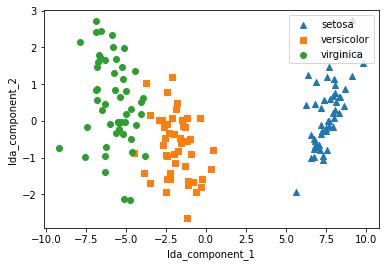

In [23]:
lda_columns = ['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^','s','o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2, 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data,y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

In [24]:
#svd 모듈 임포트
from numpy.linalg import svd

#4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [25]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print(f'U matrix : {np.round(U,3)}')
print(f'Sigma Value : {np.round(Sigma,3)}')
print(f'V transpose matrix : {np.round(Vt,3)}')

(4, 4) (4,) (4, 4)
U matrix : [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value : [3.423 2.023 0.463 0.079]
V transpose matrix : [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [27]:
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U,Sigma_mat),Vt)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [28]:
a[2] = a[0] + a[1]
a[3] = a[0]

print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [29]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print(f'U matrix : {np.round(U,3)}')
print(f'Sigma Value : {np.round(Sigma,3)}')
print(f'V transpose matrix : {np.round(Vt,3)}')

(4, 4) (4,) (4, 4)
U matrix : [[ 0.246  0.583 -0.071 -0.771]
 [-0.774 -0.017  0.551 -0.31 ]
 [-0.529  0.566 -0.551  0.31 ]
 [ 0.246  0.583  0.623  0.461]]
Sigma Value : [2.663 0.807 0.    0.   ]
V transpose matrix : [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]
 [-0.703 -0.444  0.056  0.553]
 [-0.129  0.659 -0.606  0.426]]


In [31]:
U_=U[:,:2]
Sigma_=np.diag(Sigma[:2])
Vt_ = Vt[:2]
print(U_.shape,Sigma_.shape,Vt_.shape)

a_=np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [33]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6,6))
print(matrix)
U, Sigma, Vt = svd(matrix,full_matrices=False)
print(U.shape,Sigma.shape,Vt.shape)
print(Sigma)

num_components = 4
U_tr,Sigma_tr, Vt_tr = svds(matrix,k=num_components)
print(U_tr.shape,Sigma_tr.shape,Vt_tr.shape)
print(Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr)

print(matrix_tr)

[[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]
(6, 6) (6,) (6, 6)
[3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]
(6, 4) (4,) (4, 6)
[0.55463089 0.83865238 0.88116505 3.2535007 ]
[[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726589 0.47953891 0.56613544 0.80746028 0.13135039 0.03479656]]


Text(0, 0.5, 'TruncatedSVD Component 2')

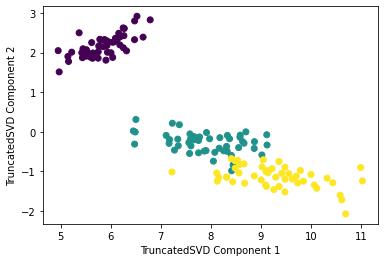

In [34]:
from sklearn.decomposition import TruncatedSVD, PCA

iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:,0], y = iris_tsvd[:,1], c = iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'NMF Component 2')

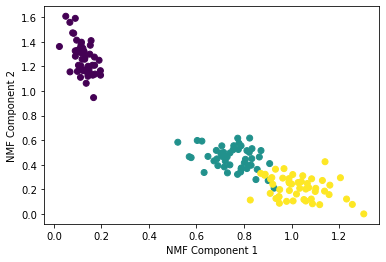

In [36]:
from sklearn.decomposition import NMF

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0],y=iris_nmf[:,1],c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
